# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [1]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import color
from skimage import img_as_float
from matplotlib import cm
from scipy.stats import norm
from skimage import exposure
from skimage import filters
from skimage.filters import rank
from skimage import transform
from skimage import img_as_ubyte

from scipy import signal
from scipy.io import wavfile
from scipy import fftpack



Pretty printing has been turned OFF


## 2D - Discrete Fourier Transform
**1.1** Consider a syntetic image as following:

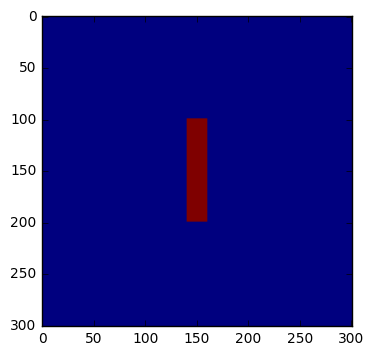

In [2]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

plt.figure()
plt.imshow(img)

**1.2** We can compute the FFT as follows:

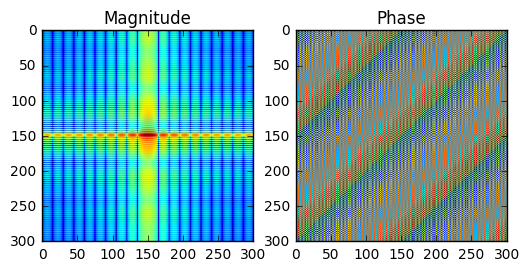

In [3]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq))
ax2.set_title('Phase')


**1.3** Compute the FFT of translated, rotated and other verisons of the synthetic image and illustrate the magnitude and phase of the frequency response. 

Discuss your observations

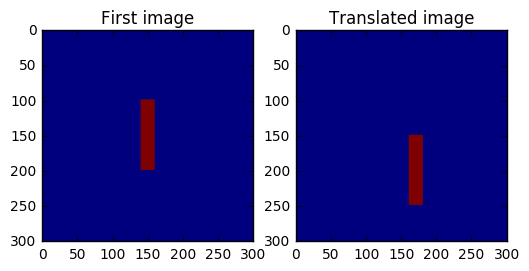

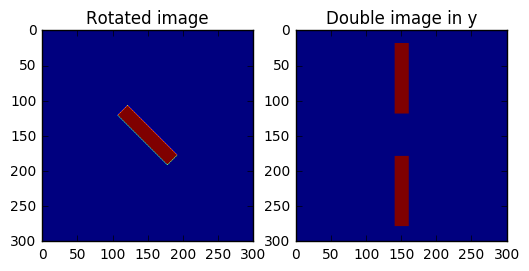

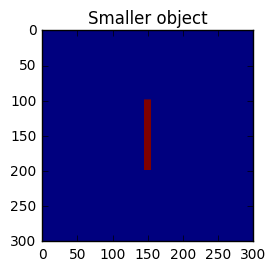

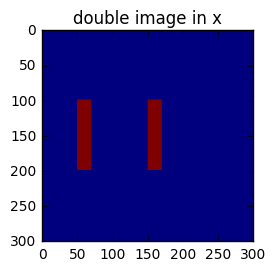

In [5]:
# Create a synthetic image
img = np.zeros((301,301))
# Draw a rectangle inside
img[100:200, 140:160] = 255

# Create a synthetic image
img_trans = np.zeros((301,301))
# Draw a rectangle inside
img_trans[150:250, 160:180] = 255

img_rot = transform.rotate(img, 45)

# Create a synthetic image
img2 = np.zeros((301,301))
# Draw a rectangle inside
img2[20:120, 140:160] = 255
img2[180:280, 140:160] = 255


# Create a synthetic image
img3 = np.zeros((301,301))
# Draw a rectangle inside
img3[100:200, 145:155] = 255

img4 = np.zeros((301,301))
img4[100:200, 50:70] = 255
img4[100:200, 150:170] = 255

plt.figure
plt.subplot(121)
plt.imshow(img)
plt.title('First image')

plt.subplot(122)
plt.imshow(img_trans)
plt.title('Translated image')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(img_rot)
plt.title('Rotated image')

plt.subplot(122)
plt.imshow(img2)
plt.title('Double image in y')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(img3)
plt.title('Smaller object')
plt.show()

plt.subplot(122)
plt.imshow(img4)
plt.title('double image in x')
plt.show()

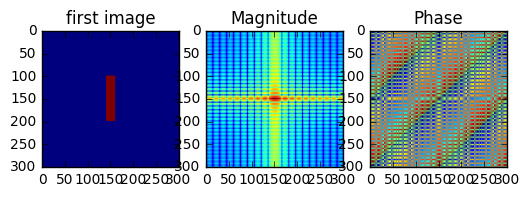

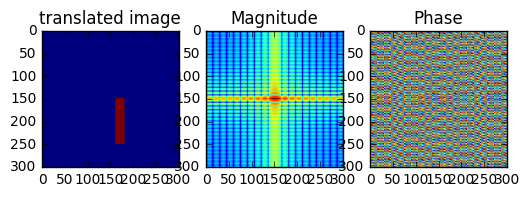

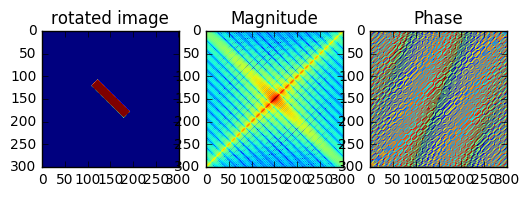

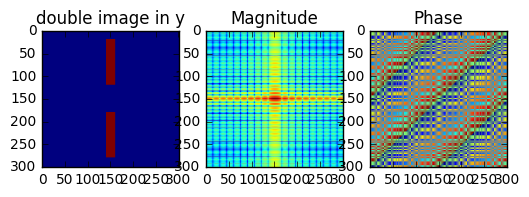

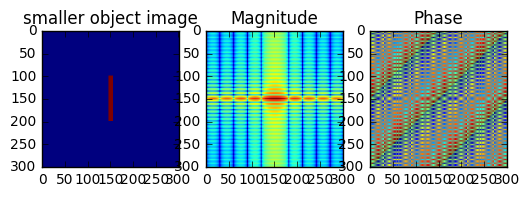

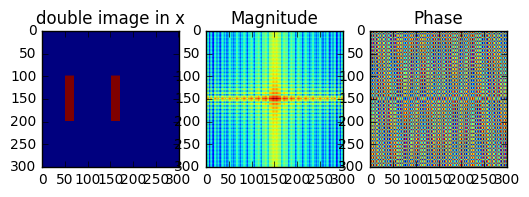

In [6]:
# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img)
ax1.set_title('first image')
ax2.imshow(exposure.adjust_log(np.abs(img_freq)))
ax2.set_title('Magnitude')
ax3.imshow(np.angle(img_freq))
ax3.set_title('Phase')

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img_trans))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_trans)
ax1.set_title('translated image')
ax2.imshow(exposure.adjust_log(np.abs(img_freq)))
ax2.set_title('Magnitude')
ax3.imshow(np.angle(img_freq))
ax3.set_title('Phase')

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img_rot))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_rot)
ax1.set_title('rotated image')
ax2.imshow(exposure.adjust_log(np.abs(img_freq)))
ax2.set_title('Magnitude')
ax3.imshow(np.angle(img_freq))
ax3.set_title('Phase')

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img2))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img2)
ax1.set_title('double image in y')
ax2.imshow(exposure.adjust_log(np.abs(img_freq)))
ax2.set_title('Magnitude')
ax3.imshow(np.angle(img_freq))
ax3.set_title('Phase')

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img3))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img3)
ax1.set_title('smaller object image')
ax2.imshow(exposure.adjust_log(np.abs(img_freq)))
ax2.set_title('Magnitude')
ax3.imshow(np.angle(img_freq))
ax3.set_title('Phase')

# Compute the DFT
img_freq = np.fft.fftshift(np.fft.fft2(img4))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img4)
ax1.set_title('double image in x')
ax2.imshow(exposure.adjust_log(np.abs(img_freq)))
ax2.set_title('Magnitude')
ax3.imshow(np.angle(img_freq))
ax3.set_title('Phase')

In [ ]:
# The translation of object will not cause any chnage in magnitude of frequency spectrum but when object is rotated
# the magnitude of frequency spectrum also rotates. 
# when we scale the object to become smaller (W), as the width decreased the zero crossings of the gaussian (1/W) in that 
# direction will be more than the general case.

**1.4** Lets consider another synthetic image as follows, compute the phase and the magnitude of the followig image and display the normalized center frequency 

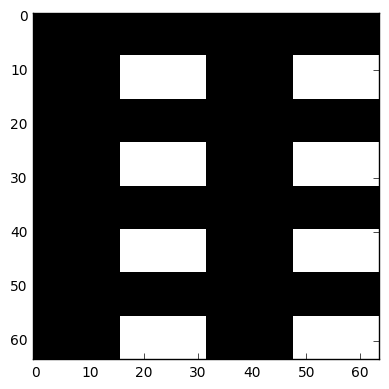

The normalised centre frequency is : 0.250000


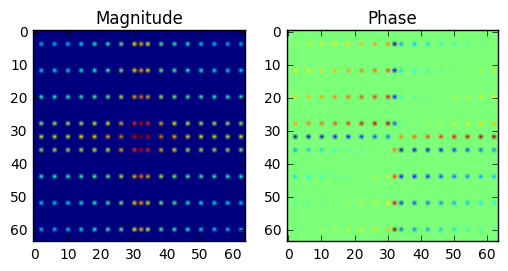

In [13]:
N = 64
Img = np.zeros((N,N))
# Length of the signal
T = 1. 
# Sampling period 
Ts = T/N 
Fs = 1./Ts
df = Fs/N
tem = np.ones((8,16))
Img[N/8:N/4, N/4:N/2] = tem 
Img[0:N/4,N/2:] = Img[0:N/4, :N/2]
Img[N/4:N/2,:] = Img[0:N/4 ,:]
Img[N/2:,:] = Img[0:N/2,:]

plt.figure
io.imshow(Img)
plt.show()

# Compute the DFT
img_freq1 = np.fft.fftshift(np.fft.fft2(Img))

# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(np.abs(img_freq1)))
ax1.set_title('Magnitude')
ax2.imshow(np.angle(img_freq1))
ax2.set_title('Phase')

#normalised center frequency
norm_cen_freq = np.abs(img_freq1[N/2,N/2])/(N*N)
print('The normalised centre frequency is : %f' %norm_cen_freq)

**1.5** Plot $|I_{f}(u,0)|$ and $|I_{f}(0,v)|$ with the corrrect frequency range. 

Discuss your observations.


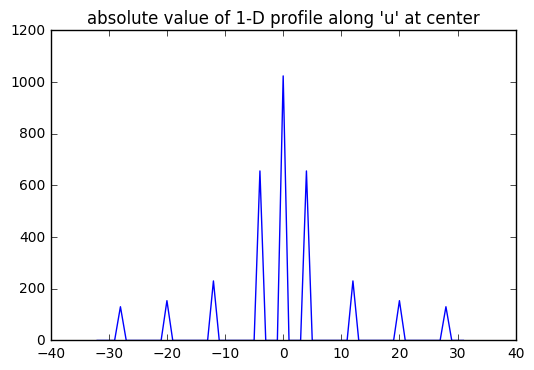

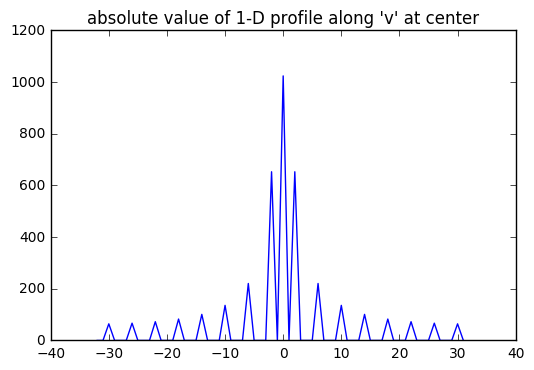

In [30]:
plt.figure(1)
fr = np.arange(-N/2,N/2,1)
# for along u-axis direction at center
plt.plot(fr, np.abs(img_freq1[:,N/2]))
plt.title('absolute value of 1-D profile along \'u\' at center')

plt.figure(2)
# for along v-axis direction at center
plt.plot(fr,np.abs(img_freq1[N/2,:]))
plt.title('absolute value of 1-D profile along \'v\' at center')

# as width (W) of box is more in v-axis direction as compared to u-axis direction, the zero crossing (1/W) of gaussian in
# v-axis direction is smaller than u-axis direction as seen from profile.

**1.6** Load the `lena` image, and show its phase and its magnitude, then reconstruct the image using either frequency or phase. 

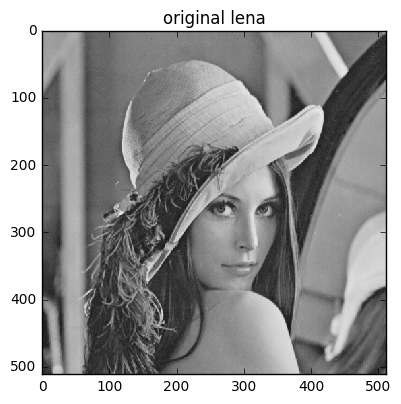

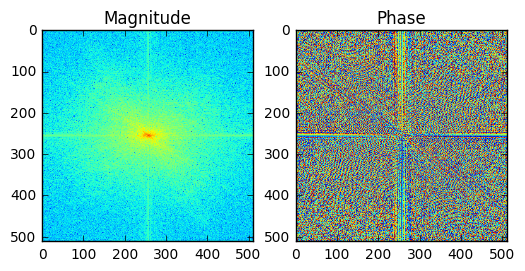

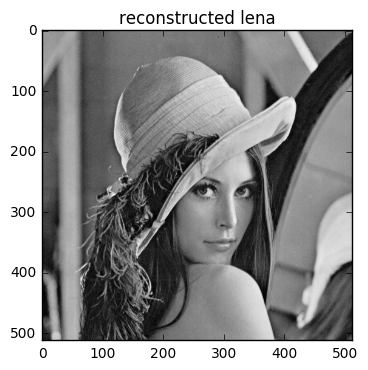

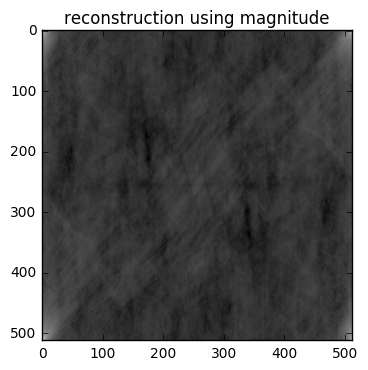

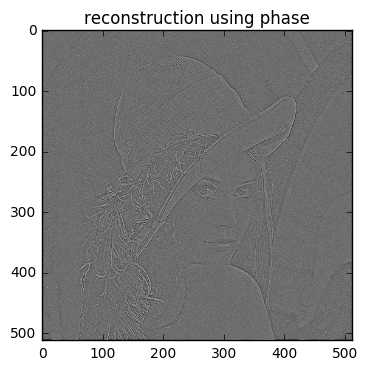

In [46]:
#load image
path = '../images/'
imagename = 'lena-grey.bmp'
lena_img = io.imread(path.__add__(imagename))
plt.figure(1)
io.imshow(lena_img)
plt.title('original lena')
lena_img  =img_as_ubyte(lena_img)  #convert as ubyte


img_freq = np.fft.fftshift(np.fft.fft2(lena_img)) #perform dft
mag_freq = np.abs(img_freq) #magnitude
ang_freq = np.angle(img_freq) #phase

#plt.figure(2)
# We can show the magnitude and the phase
# Two subplots, the axes array is 1-d
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exposure.adjust_log(mag_freq))
ax1.set_title('Magnitude')
ax2.imshow(ang_freq)
ax2.set_title('Phase')

img_freq = np.fft.fft2(lena_img)

#inverse dft (reconstruction) 
lena_recon = np.fft.ifft2(img_freq)
plt.figure(3)
plt.imshow(np.real(lena_recon), cmap = plt.cm.gray)
plt.title('reconstructed lena')
plt.show()

#inverse dft (reconstruction) of magnitude alone
lena_recon_mag = np.fft.ifft2(np.abs(img_freq))
plt.figure(4)
plt.imshow(exposure.adjust_log(np.real(lena_recon_mag)),cmap = plt.cm.gray)
plt.title('reconstruction using magnitude')
plt.show()

#inverse dft (reconstruction) of phase alone
mag_freq[:,:] = 255
lena_recon_phase = np.fft.ifft2(mag_freq*np.exp(1j * np.angle(img_freq)))
plt.figure(5)
plt.imshow((np.real(lena_recon_phase)),cmap = plt.cm.gray)
plt.title('reconstruction using phase')
plt.show()

**1.7** Apply the sobel filter only in vertical direction to `lena` image in the frequency domain.

### Filtering in Frequency domain 

In order to build a frequency filter $H(u,v)$ from its spatial counterpart $h(x,y)$, we need to:

1. Build a zero padded spatial filter $h_p(x,y)$
1. Shift $h_p(x,y)$ by $(-1)^{x+y}$
1. Compute the DFT to obtain $H(u,v)$
1. Shift $H(u,v)$ by $(-1)^{x+y}$

In order to aboid the wraparound error, the image need to be zero padded

In order to perform the filtering, we need to:

1. Find the padded image size
1. Pad the image
1. Convert the spatial filter to frequency filter
1. Compute the DFT of the image with additional shift
1. Apply the multiplication in the Fourier space
1. Compute the inverse Fourier transform
1. Crop the image at its original size

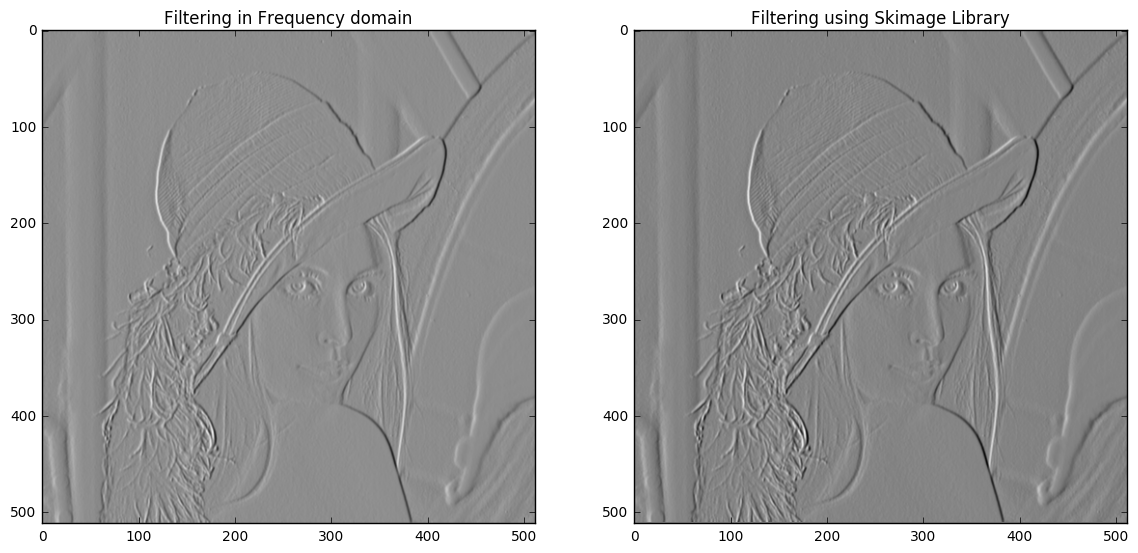

In [61]:
#load image
path = '../images/'
imagename = 'lena-grey.bmp'
lena_img = io.imread(path.__add__(imagename))

#dimension of lena
[row,col] = lena_img.shape

#converting spatial filter to frequency domain

h_p = np.zeros((row*2,col*2))
h_p[row-1:row+2,col-1:col+2] = np.matrix('1 0 -1; 2 0 -2; 1 0 -1') #filter at center to get output in top left quadrant

for r in range(h_p.shape[0]):
    for c in range(h_p.shape[1]):
        h_p[r,c] *=  np.power(-1,r+c)
        
H_p = np.fft.fft2(h_p)

for r in range(h_p.shape[0]):
    for c in range(h_p.shape[1]):
        H_p[r,c] *=  np.power(-1,r+c)

# end of converting spatial filter to frequency domain

#zero padding input image
lena_pad = np.zeros((2*row, 2*col))
lena_pad[0:row,0:col] = lena_img

#dft of input and shifting
lena_freq = np.fft.fftshift(np.fft.fft2(lena_pad))

#multiplying image and filter in freq domain
lena_freq_filter = np.multiply(lena_freq,H_p)

#idft of product 
lena_spatial_filter  = np.fft.ifft2(np.fft.fftshift(lena_freq_filter))

#taking output from top left quadrant
lena_spatial_filter = lena_spatial_filter[:row,:col]

#comparing frequency domain filtering with function in skimage
lena_img_sobel_skimage = filters.sobel_v(lena_img)
f, (ax0,ax1) = plt.subplots(1,2,figsize = (14,7))
ax0.imshow(np.real(lena_spatial_filter),cmap= plt.cm.gray)
ax0.set_title('Filtering in Frequency domain')
ax1.imshow(lena_img_sobel_skimage,cmap=plt.cm.gray)
ax1.set_title('Filtering using Skimage Library') 



